# Project: Customer Visit Analysis



In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## Step 0: Load the Data

In [31]:
data = pd.read_csv('data/visit_history.csv')
print(data.shape)

(318807, 21)


In [33]:
pd.set_option('display.max_columns', 100)
data.head()

,first_time_flag,appointment_flag,sc_flag,arrival_time,depart_time,stay_duration,drive_time_f,drive_time_t,drive_duration,drive_model,Intentional_model,current_brand,trail,quote_flag,order_flag,delivery_flag,objective,area_region,area,tier_city,subregion
0,是,否,否,08:46,08:51,5分,NaN,NaN,NaN,NaN,A/B-Class,奔驰,散客,否,否,否,看车比价,East,Ningbo,Tier 1,East 2
1,是,否,SC20,08:08,08:08,0分,NaN,NaN,NaN,NaN,NaN,NaN,散客,NaN,NaN,NaN,办手续,North,Beijing,Tier 1,North 1
2,是,否,否,08:08,08:08,0分,NaN,NaN,NaN,NaN,PbP GLA-Class,NaN,散客,NaN,NaN,NaN,看车比价,North,Beijing,Tier 1,North 1
3,是,否,SC23,08:21,08:24,3分,NaN,NaN,NaN,NaN,NaN,NaN,散客,NaN,NaN,NaN,办手续,North,Beijing,Tier 1,North 1
4,是,否,否,08:25,08:37,12分,NaN,NaN,NaN,NaN,PbP C-Class,NaN,散客,NaN,NaN,NaN,看车比价,North,Beijing,Tier 1,North 1


## Step 1: Preprocessing

In [34]:
print('Total number of missing values is: {}'.format(data.isnull().sum().sum())) 
data.isnull().sum()

Total number of missing values is: 1264677


first_time_flag           0
appointment_flag          0
sc_flag                   0
arrival_time              4
depart_time               4
stay_duration             4
drive_time_f         260078
drive_time_t         260078
drive_duration       260078
drive_model          260093
Intentional_model      1529
current_brand        165091
trail                     0
quote_flag            19221
order_flag            19221
delivery_flag         19221
objective                11
area_region               0
area                      0
tier_city                 0
subregion                44
dtype: int64

In [35]:
na_col = data.isnull().sum()
pct_na_col =(na_col[na_col > 0] / len(data))*100 

pct_na_col.sort_values(ascending=False)

drive_model          81.583215
drive_duration       81.578510
drive_time_t         81.578510
drive_time_f         81.578510
current_brand        51.783995
delivery_flag         6.029040
order_flag            6.029040
quote_flag            6.029040
Intentional_model     0.479601
subregion             0.013801
objective             0.003450
stay_duration         0.001255
depart_time           0.001255
arrival_time          0.001255
dtype: float64

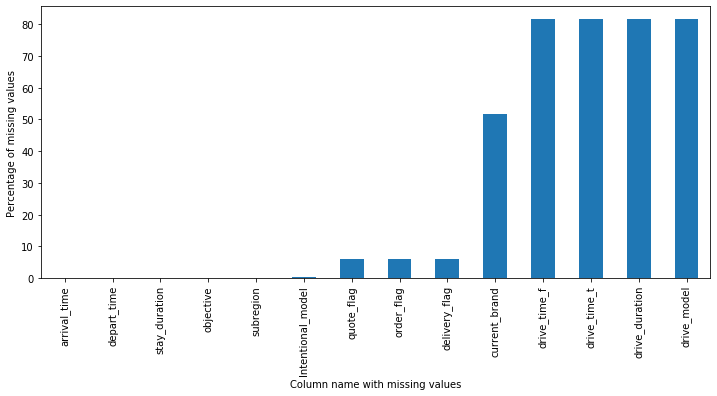

In [37]:
# let’s see a bar plot of all columns with missing values and their percentage.
pct_na_col.sort_values(inplace=True)

pct_na_col.plot.bar(figsize=(12,5))
plt.xlabel('Column name with missing values')
plt.ylabel('Percentage of missing values')
plt.show()

In [13]:
data.objective.unique()

array(['看车比价', '办手续', '交车', '订单', '其他', '退订', nan, '交车后退车'], dtype=object)